# Eliminación de nodos en Árbol Splay

La eliminación de nodos en un árbol splay es un proceso que implica no solo la eliminación del nodo deseado sino también la reorganización del árbol para mantener sus propiedades y eficiencia en las operaciones futuras. Este proceso se beneficia de la habilidad de los árboles splay para adaptarse dinámicamente y "aprender" de las operaciones realizadas, lo cual puede ayudar a mejorar el tiempo promedio de acceso a los elementos.

## Concepto de Eliminación en Árboles Splay

La operación de eliminación en un árbol splay sigue un procedimiento específico que asegura que, después de eliminar un nodo, el árbol se reestructure (o "splay") para mantener un acceso equilibrado a sus elementos. Este proceso consta de varios pasos clave:

1. **Splay del Nodo a Eliminar:**
   - Primero, se realiza una operación de splay en el nodo que se desea eliminar. Esto trae el nodo al root del árbol, asegurando que la eliminación pueda realizarse directamente en la raíz.

2. **Reestructuración del Árbol:**
   - Si el nodo a eliminar (ahora en la raíz) no tiene hijos, simplemente se elimina.
   - Si tiene un solo hijo, ese hijo reemplaza al nodo eliminado como la nueva raíz del árbol.
   - Si el nodo tiene dos hijos, se encuentra el nodo más grande del subárbol izquierdo (el predecesor inmediato) o el nodo más pequeño del subárbol derecho (el sucesor inmediato), se realiza un splay de ese nodo, y luego se elimina el nodo original. Esto asegura que el árbol permanezca splay-balanced.

## Implementación en Python
Para ilustrar la eliminación de nodos en un árbol splay, a continuación se muestra una implementación básica en Python. Esta implementación cubre la estructura del árbol splay y la operación de eliminación, destacando cómo el árbol se reorganiza después de cada eliminación.

Aquí te muestro cómo implementar este método en la clase [`SplayTree`](src/SplayTree.py):

In [1]:
# Código utilitario
from src.visualization import visualize_bt
# ver src/SplayTree.py
from src.SplayTree import SplayTree

In [2]:
def delete(self, data):
    # Primero, buscamos el nodo con el valor a eliminar y realizamos un splay para llevarlo a la raíz.
    node_to_delete = self.search(data)

    if node_to_delete is None:
        print(f"El nodo con el valor {data} no se encuentra en el árbol.")
        return

    # Separamos el árbol en dos subárboles, izquierdo y derecho, excluyendo la raíz (nodo a eliminar).
    left_subtree = node_to_delete.left
    right_subtree = node_to_delete.right

    if left_subtree:
        left_subtree.parent = None
    if right_subtree:
        right_subtree.parent = None

    # Si el subárbol izquierdo es no nulo, buscamos el elemento más grande (el más a la derecha) para hacerlo la nueva raíz.
    if left_subtree:
        self.root = left_subtree
        # Buscamos el elemento más a la derecha del subárbol izquierdo.
        largest_in_left = left_subtree
        while largest_in_left.right:
            largest_in_left = largest_in_left.right
        # Realizamos un splay de este nodo, para que sea la nueva raíz del árbol.
        self.splay(largest_in_left)
        # Conectamos el subárbol derecho con la nueva raíz.
        self.root.right = right_subtree
        if right_subtree:
            right_subtree.parent = self.root
    else:
        # Si no hay subárbol izquierdo, el subárbol derecho se convierte directamente en la nueva raíz.
        self.root = right_subtree

    print(f"El nodo con el valor {data} ha sido eliminado.")


# Extender la clase SplayTree con el nuevo método
SplayTree.delete = delete

## Pruebas de la Función de Eliminación

Para probar la función de eliminación en nuestro árbol Splay, vamos a insertar varios elementos en el árbol, eliminar algunos de ellos y observar cómo se reorganiza el árbol después de cada operación de eliminación.

Insertar: 10


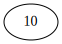

Insertar: 4
Splay - rotación a la derecha (Zig): 4
Rotación derecha: 10 ahora es la nueva raíz.


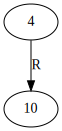

Insertar: 20
Splay - doble rotación a la izquierda (Zag-Zag): 20
Rotación izquierda: 4 ahora es la nueva raíz.
Rotación izquierda: 10 ahora es la nueva raíz.


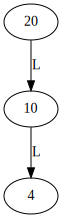

Insertar: 1
Splay - doble rotación a la derecha (Zig-Zig): 1
Splay - rotación a la derecha (Zig): 1
Rotación derecha: 20 ahora es la nueva raíz.


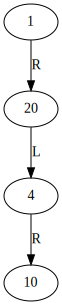

Insertar: 5
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 5
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 5
Rotación izquierda: 1 ahora es la nueva raíz.


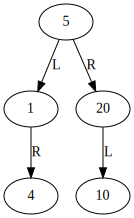

Insertar: 17
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 17
Splay - rotación a la izquierda (Zag): 17
Rotación izquierda: 5 ahora es la nueva raíz.


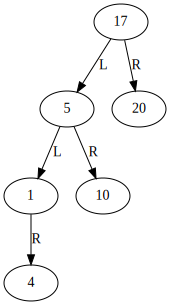

Insertar: 21
Splay - doble rotación a la izquierda (Zag-Zag): 21
Rotación izquierda: 17 ahora es la nueva raíz.
Rotación izquierda: 20 ahora es la nueva raíz.


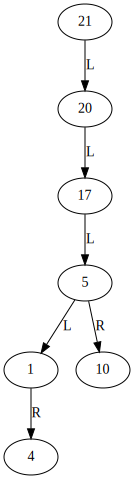

In [3]:
# Crear una instancia del árbol Splay
splay_tree = SplayTree()

# Insertar elementos en el árbol
elementos = [10, 4, 20, 1, 5, 17, 21]
for elemento in elementos:
    splay_tree.insert(elemento)
    # Visualizar el árbol
    dot = visualize_bt(splay_tree)
    display(dot)

In [4]:
# Eliminar un elemento que no existe en el árbol
print("Intentando eliminar un elemento que no existe (100):")
splay_tree.delete(100)

Intentando eliminar un elemento que no existe (100):
Visitando: 21
Nodo no encontrado. Realizando splay en último nodo visitado: 21
El nodo con el valor 100 no se encuentra en el árbol.


Eliminando un elemento que existe (4):~
Visitando: 21
Visitando: 20
Visitando: 17
Visitando: 5
Visitando: 1
Visitando: 4
Nodo encontrado: 4. Realizando splay...
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 4
Splay - doble rotación a la derecha (Zig-Zig): 4
Splay - rotación a la derecha (Zig): 4
Rotación derecha: 21 ahora es la nueva raíz.
El nodo con el valor 4 ha sido eliminado.
Árbol después de eliminar 4:


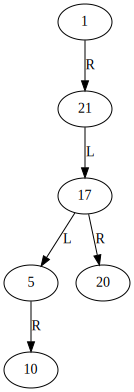

In [5]:
# Eliminar un elemento que existe en el árbol
print("Eliminando un elemento que existe (4):~")
splay_tree.delete(4)
print("Árbol después de eliminar 4:")
# Visualizar el árbol
dot = visualize_bt(splay_tree)
display(dot)

Eliminando otro elemento (10):
Visitando: 1
Visitando: 21
Visitando: 17
Visitando: 5
Visitando: 10
Nodo encontrado: 10. Realizando splay...
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 10
Splay - rotación a la derecha seguido de rotación a la izquierda (Zig-Zag): 10
Rotación izquierda: 1 ahora es la nueva raíz.
Splay - rotación a la izquierda (Zag): 5
Rotación izquierda: 1 ahora es la nueva raíz.
El nodo con el valor 10 ha sido eliminado.
Árbol después de eliminar 10:


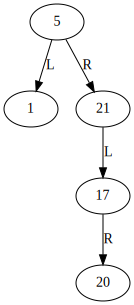

In [6]:
# Eliminar otro elemento
print("Eliminando otro elemento (10):")
splay_tree.delete(10)
print("Árbol después de eliminar 10:")
# Visualizar el árbol
dot = visualize_bt(splay_tree)
display(dot)

Eliminando un elemento con dos hijos (20):
Visitando: 5
Visitando: 21
Visitando: 17
Visitando: 20
Nodo encontrado: 20. Realizando splay...
Splay - rotación a la izquierda seguido de rotación a la derecha (Zag-Zig): 20
Splay - rotación a la izquierda (Zag): 20
Rotación izquierda: 5 ahora es la nueva raíz.
Splay - rotación a la izquierda (Zag): 17
Rotación izquierda: 5 ahora es la nueva raíz.
El nodo con el valor 20 ha sido eliminado.


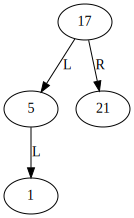

In [7]:
# Eliminar un elemento con dos hijos
print("Eliminando un elemento con dos hijos (20):")
splay_tree.delete(20)
# Visualizar el árbol
dot = visualize_bt(splay_tree)
display(dot)

## Complejidad del Algoritmo

La complejidad temporal de la operación de eliminación en un árbol splay es difícil de determinar en el peor de los casos debido a la naturaleza amortizada del árbol. Sin embargo, en promedio, se puede esperar que la operación tenga una complejidad de tiempo de O(log n), donde n es el número de nodos en el árbol. Esto se debe al efecto de amortización de las operaciones de splay.

La complejidad del espacio para un árbol splay es O(n), ya que necesita almacenar todos los nodos del árbol.

## Ejercicios Prácticos

1. **Implementar la función de splay:** Completar la implementación de la función `splay()` en la clase `SplayTree` para manejar casos específicos de zig, zag, zig-zig, y zig-zag.
2. **Eliminación de múltiples nodos:** Escribir una función que elimine múltiples nodos dados en una lista del árbol splay y analizar cómo cambia la estructura del árbol después de cada eliminación.

## Soluciones a los Ejercicios

### Ejercicio 1: Implementación de la función de splay

La implementación detallada de `splay()` requeriría manejar varios casos dependiendo de la posición del nodo a splay con respecto a su padre y abuelo, aplicando las rotaciones adecuadas para mover el nodo hacia la raíz.

### Ejercicio 2: Eliminación de múltiples nodos

Una función para eliminar múltiples nodos debería iterar sobre la lista de nodos a eliminar, aplicando la operación de eliminación a cada uno. Sería interesante observar y analizar cómo cada operación de eliminación sucesiva afecta la altura y estructura general del árbol.